# Object Oriented Programming
Daniel Böckenhoff



## Teaser

### Remember from Introductory Talk: Flat is better than nested

<span style="color:red">Bad</span>: Nested / One to rule them all

In [1]:
import numpy as np
def load(path):
    return np.linspace(1,10,500)

def plot(*args, **kwargs):
    pass

def request(asdf):
    return True

def compute(asdf):
    return 2

def norm(a, b):
    return 2**0.5

def union(a, b):
    return a

def difference(a, b):
    return b

class Mesh(object):
    def __init__(*args, **kwargs):
        pass
    
def convert(x, y):
    return '20200114'

In [2]:
def get_heat_load_from_ircam(
             prog_no, time,
             plot_divertor=False,
             plot_temperature=True,
             preprocess=False,
             scale=42.,
             return_nested_dict=False,
             **kwargs
            ):
    
    # ...
    # 10000 lines of code
    # ...
    result = 42.
    

    return  result

# USE CASE
prog_no = '20200214'
time = 456
heat_load = get_heat_load_from_ircam(prog_no, time, plot_divertor=True, plot_temperature=True, preprocess=False, scale=1.)

<span style="color:green">Good</span>: Flat functional programming

In [3]:
def ircam_data(prog_no, time):
    return load('archive.ir-url.com' + '/' + prog_no)[time]

def ircam_temperature(prog_no, time):
    factor = 42.
    data = ircam_data(prog_no, time)
    return data * factor

def ircam_heat_load(prog_no, time):
    data = ircam_temperature(prog_no, time)
    return data / 42

def plot_ir_stuff(data):
    plot(data)

def plot_component(component_id):
    plot(load(component_id))

# USE CASE
heat_load = ircam_heat_load(prog_no, time)
plot_ir_stuff(heat_load)
plot_component('divertor')

<span style="color:green">Better (in this case)</span>: Object oriented programming

In [4]:
class IRCam(object):
    _url = 'archive.ir-url.com'
    def __init__(self, prog_no, time):
        self.prog_no = prog_no
        self.time = time
        
    def _get_data(self):
        return load(self._url + '/' + self.prog_no)[self.time]
    
    def temperature(self):
        factor = 42.
        return self._get_data() * factor
    
    def heat_load(self):
        return self.temperature() / 42
    
    def plot(self):
        plot(self.time, self._get_data())
        
def plot_divertor():
    divertor_component_id = '52'
    plot(load(divertor_component_id))
    
# USE CASE
ircam = IRCam(prog_no, time)
heat_load = ircam.heat_load()
ircam.plot()
plot_component('divertor')

# Concept

OOP = **Programming paradigm** which provides a means of structuring programs so that **properties and behaviors are bundled into** individual **objects**.

## Terminology

### Class vs Object

A **class** is a **blueprint** ...

In [5]:
class IRCam(object):
    pass

... used to *instantiate* **objects**/**instances**

In [6]:
ircam = IRCam()

### Classes and objects can contain data stored in **attributes**:

Class attributes are handed down to objects:

In [7]:
class IRCam(object):
    url = 'archive.ir-url.com'
    
IRCam.class_attribute = 42

# the instance has access to the class attributes
ircam = IRCam()
ircam.class_attribute, ircam.url

(42, 'archive.ir-url.com')

Object attributes are not affecting the class:

In [8]:
ircam.attribute = 24

# attribute has been set to the object only ...
print(ircam.attribute)

# ... so the class has no access
IRCam.attribute

24


AttributeError: type object 'IRCam' has no attribute 'attribute'

### **Methods** vs **Function**:

Pretty much the same but...

... a method lives in the namespace of its class

In [9]:
def function():
    print("Global HELLO!")

class IRCam(object):
    def method(self):
        print("Hello!")

function()
        
ircam = IRCam()
ircam.method()

Global HELLO!
Hello!


... and especially: **Methods may alter the object** through **'self'** pointer ('this' in C++/Java)

In [10]:
class IRCam(object):
    url = 'archive.ir-url.com'    
    def initialize(self, prog_no, time):
        self.prog_no = prog_no
        self.time = time
        self.calibration_factor = 42.
         
    def get_data(self):                                          
        return load(self.url + '/' + self.prog_no)[self.time]
    
    def temperature(self):
        return self.get_data() * self.calibration_factor
    
    def recalibrate(self):
        self.calibration_factor = compute(self.prog_no)

In [11]:
# USE CASE
ircam = IRCam()
ircam.initialize(prog_no, time)

cali1 = ircam.temperature()

ircam.recalibrate()
cali2 = ircam.temperature()

### Constructors

In [12]:
ircam = IRCam()
ircam.initialize(prog_no, time)

I need to initialize every object. Can I automize?

Sure. Overload the constructor

In [13]:
class IRCam(object):
    def __init__(self, prog_no, time):
        self.prog_no = prog_no
        self.time = time
        self.calibration_factor = None

In [14]:
# USE CASE
ircam = IRCam(prog_no, time)

ircam.prog_no

'20200214'

## Principles
* Abstraction
* Encapsulation
* Inheritance
* Polymorphism

### Abstraction

* Helps with keeping the overview over complex / complicated structures

### Encapsulation

Make your class a black box:
* **private** attributes/methods may only be **accessed from within** the class
* **public** attributes/methods expose the objects to **outside access**

In [15]:
class IRCam(object):
    _url = 'archive.ir-url.com'  # private attribute    
    
    def __init__(self, prog_no):
        self.prog_no = prog_no
        self._test =25
        self.__factor = 42.  # private attribute              
         
    def _get_data(self):  # private method                                        
        return load(self._url + '/' + self.prog_no)[self.time]
    
    # public method
    def temperature(self):  # public method
        return self._get_data() * self.__factor  # methods may invoke privates   
        

# USE CASE
ircam = IRCam(prog_no)
print(ircam._url)  # convention
print(ircam.__factor)  # enforced

archive.ir-url.com


AttributeError: 'IRCam' object has no attribute '__factor'

### Inheritance

In [16]:
def ircam_data(prog_no, time):
    return load('archive.ir-url.com' + '/' + prog_no)[time]

def ircam_temperature(prog_no, time):
    factor = 42.
    data = ircam_data(prog_no, time)
    return data * factor

def ircam_heat_load(prog_no, time):
    data = ircam_temperature(prog_no, time)
    return data / 42

def plot_ir_stuff(data):
    plot(data)

def plot_component(component_id):
    plot(load(component_id))

# USE CASE
heat_load = ircam_heat_load(prog_no, time)
plot_ir_stuff(heat_load)
plot_component('divertor')

Let's add one more diagnostic

<span style="color:red">Bad</span>: Flat functional programming with repetitive structure

In [17]:
def ircam_data(prog_no, time): pass

def ircam_temperature(prog_no, time): pass

def ircam_heat_load(prog_no, time): pass

def plot_ir_stuff(data): pass

def langmuir_data(prog_no, time): pass

def langmuir_temperature(prog_no, time): pass

def langmuir_heat_load(prog_no, time): pass

def plot_langmuir_stuff(data): pass


# USE CASE
heat_load = ircam_heat_load(prog_no, time)
heat_load_langmuir = langmuir_heat_load(prog_no, time)
plot_ir_stuff(heat_load)
plot_langmuir_stuff(heat_load_langmuir)

Objects are often very similar. They share common logic. But they’re not entirely the same.

Inheritance → Derive from similar class (parent) and extend/change (overload) its functionality

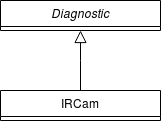

In [18]:
class Diagnostic(object):
    pass

class IRCam(Diagnostic):
    _url = 'archive.ir-url.com'
    def __init__(self, prog_no, time):
        self.prog_no = prog_no
        self.time = time
        self.__calibration_factor = None
        
    def _get_data(self):                                          
        return load(prog_no)[self.time]
    
    def plot(self):
        plot(self._get_data())

In [19]:
class Diagnostic(object):
    _url = None
    def __init__(self, prog_no, time):
        self.prog_no = prog_no
        self.time = time
        
    def plot(self):
        plot(self._get_data())

class IRCam(Diagnostic):
    _url = 'archive.ir-url.com'
    def __init__(self, prog_no, time):  # overloading
        super().__init__(prog_no, time)  # super calls parent method
        self.__calibration_factor = None  # additional functionality
        
    def _get_data(self):                                          
        return load(prog_no)[self.time]
        

# USE CASE
ircam = IRCam(prog_no, time)
ircam.plot()

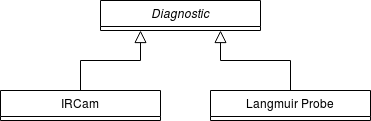

In [20]:
class Diagnostic(object):
    _url = None
    def __init__(self, prog_no, time):
        self.prog_no = prog_no
        self.time = time
        
    def _load(self, **kwargs):
        return load(self._url + '/' + self.prog_no, **kwargs)
    
    def plot(self): pass

class IRCam(Diagnostic):
    _url = 'archive.ir-url.com'
    def __init__(self, prog_no, time):
        super().__init__(prog_no, time)
        self.__factor = None                                                    
        
    def _get_data(self):                                          
        return self._load()[self.time]
    
class LangmuirProbe(Diagnostic):
    _url = 'archive.lp-url.com'
    def _get_data(self):
        return self._load(some_option=True)[self.time]
    
    def plot(self): pass

# USE CASE
ircam = IRCam(prog_no, time)
langm = LangmuirProbe(prog_no, time)
ircam.plot()
langm.plot()

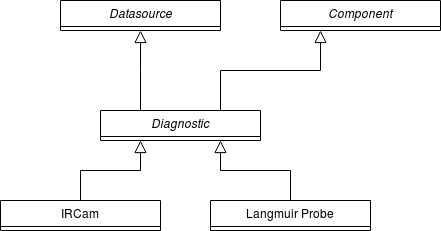

In [21]:
class Datasource(object):
    _url = None
    def __init__(self, prog_no, time):
        self.prog_no = prog_no
        self.time = time
        
    def _load(self, **kwargs):
        return load(self._url + '/' + self.prog_no, **kwargs)
    
class Component(object):
    _position = None
    
    def distance(self, other):
        return np.linalg.norm(self, other)

class Diagnostic(Datasource): pass

class IRCam(Diagnostic): pass

class LangmuirProbe(Diagnostic): pass

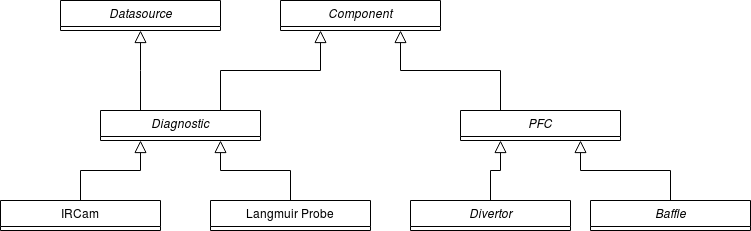

In [22]:
class Datasource(object):
    _url = None
    def __init__(self, prog_no, time):
        self.prog_no = prog_no
        self.time = time
        
    def _load(self, **kwargs):
        return load(self._url + '/' + self.prog_no, **kwargs)
    
class Component(object):
    _position = None
    
    def distance(self, other):
        return norm(self, other)

class Diagnostic(Datasource, Component): pass

class IRCam(Diagnostic): pass

class LangmuirProbe(Diagnostic): pass

class PFC(Component):
    _max_heat_load = None  # MW/m^2

class Divertor(Component):
    _max_heat_load = 10
    _position = (1,0,0)

class Baffle(Component):
    _position = (0,1,0)
    
# USE CASE
Divertor().distance(Baffle())

1.4142135623730951

Helpfull in python:

In [23]:
IRCam.__bases__, Diagnostic.__bases__

((__main__.Diagnostic,), (__main__.Datasource, __main__.Component))

### Polymorphism

Polymorphism = the same function is defined on objects of different types.

Polymorphic programming generates intuition → E.g. plot without a thought.

In [25]:
class Diagnostic(object):
    def _get_data(self):
        raise NotImplementedError(
            f"Diagnostic {self.__class__} requires the _get_data immplementation.")
        
    def plot(self):
        print(f'... plotting {self.__class__}')
        plot(self._get_data())
    
class IRCam(Diagnostic):
    def _get_data(self):
        return load('data')

class LangmuirProbe(Diagnostic): pass

# USE CASE
IRCam().plot()
LangmuirProbe().plot()

... plotting <class '__main__.IRCam'>
... plotting <class '__main__.LangmuirProbe'>


NotImplementedError: Diagnostic <class '__main__.LangmuirProbe'> requires the _get_data immplementation.

In [33]:
class Diagnostic(object):
    def __init__(self, prog_no, time):
        self.prog_no = prog_no
        self.time = time
    
    def _get_data(self):
        raise NotImplementedError(
            f"Diagnostic {self.__class__} requires the _get_data immplementation.")
        
    def plot(self):
        print(f'... plotting {self.__class__}')
        plot(self._get_data())
    
class IRCam(Diagnostic):
    def _get_data(self):
        return load('data')
    
class LangmuirProbe(Diagnostic):
    def _get_data(self):
        return load('data')
    
class Bolometer(Diagnostic):
    def _get_data(self):
        return load('data')

Generic automization as side product

In [34]:
def plot_diagnostics(prog_no, time, *diagnostics):
    for Diag in diagnostics:
        diag = Diag(prog_no, time)
        diag.plot()
        
# USE CASE
plot_diagnostics(prog_no, time,
                 LangmuirProbe, IRCam, Bolometer) 

... plotting <class '__main__.LangmuirProbe'>
... plotting <class '__main__.IRCam'>
... plotting <class '__main__.Bolometer'>


### Python Builtin Polymorphisms aka. 'Magic Methods'

Python provides protocols which is polymorphism under the hood. These implement consistent behaviour for built in objects of different type.

### Comparisons

In [35]:
class PFC(object):
    _area = None
    def __eq__(self, other):
        return self._area == other._area
    
    def __lt__(self, other):
        return self._area < other._area
        
    def __ge__(self, other):
        return self._area >= other._area
        
class Divertor(PFC):
    _area = 4
    
class Baffle(PFC):
    _area = 3
        
        
# USE CASES
div = Divertor()
baf = Baffle()

(div == baf, div >= baf, div < baf)

(False, True, False)

### Numerics

In [36]:
class PFC(object):
    _mesh = None    
    def __add__(self, other):
        mesh = union(self._mesh, other._mesh)
        obj = PFC()
        obj._mesh = mesh
        return obj
    
    def __and__(self, other):
        return self + other
    
    def __sub__(self, other):
        mesh = difference(self._mesh, other._mesh)
        obj = PFC()
        obj._mesh = mesh
        return obj
        
class Divertor(PFC):
    _mesh = Mesh(3,5,6,72,73)
    
class Baffle(PFC):
    _mesh = Mesh(1,52,52,72,573)
        
# USE CASES
div = Divertor()
baf = Baffle()

print(div + baf, div & baf,  div - baf)

<__main__.PFC object at 0x7f0f0c9ad790> <__main__.PFC object at 0x7f0f0ca6c150> <__main__.PFC object at 0x7f0f0ca6c290>


### Context Managers

In [37]:
class Datasource(object):
    def __enter__(self):
        print("... Opening archive stream")
        return self
        
    def __exit__(self, exception_type, exception_value, traceback):
        print("... Closing archive stream")
        
    def read(self):
        print("... Reading stream")
        
        
# USE CASE
with Datasource() as ds:
    ds.read()

... Opening archive stream
... Reading stream
... Closing archive stream


Good list of complete magic methods @ [here](https://rszalski.github.io/magicmethods/)
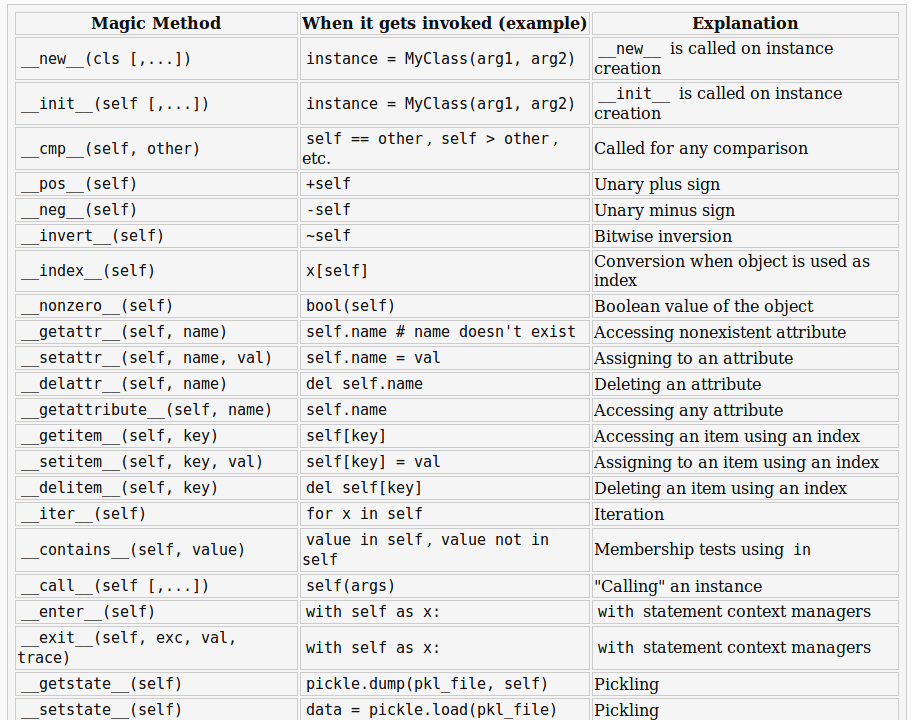
...

## Further Concepts

### Factory methods
What if i want to initialize multiple classes of the same kind with different input?

In [38]:
class Datasource:
    def __init__(self, prog_no):
        self._prog_no = prog_no

class DatasourceDatetime:
    def __init__(self, day):
        self._prog_no = convert(day, 'day->prog_no')
        
class DatasourceFromFile:
    def __init__(self, path):
        self._prog_no = convert(path)         

_ = ...

Factory method = wrapper for constructor

In [39]:
class Datasource:
    def __init__(self, prog_no):
        self._prog_no = prog_no
        
    @classmethod
    def from_datetime(cls, dtm):
        return cls(convert(dtm, 'day->prog_no'))
    
    @classmethod
    def from_file(cls, path):
        return cls(convert(path, True))
    
a = Datasource('20200114')
b = Datasource.from_datetime('2020/01/14')
c = Datasource.from_file('cached_shot.txt')

a._prog_no == b._prog_no == c._prog_no

True

## Summary
Functional programming (FP) and OOP are orthogonal

Philosophy:
**FP**: **Fixed set of things** and you add operations
**OOP**: **Fixed set of operations** but more things get added

## Benefits of OOP
* Encapsulation
    * Readability & Documentaion
* Abstraction
    * Add structure to complex code 
* Inheritance
    * Avoid repetition
    * Easy extension / maintenance
    * Less code
* Polymorphism
    * Intuitive code

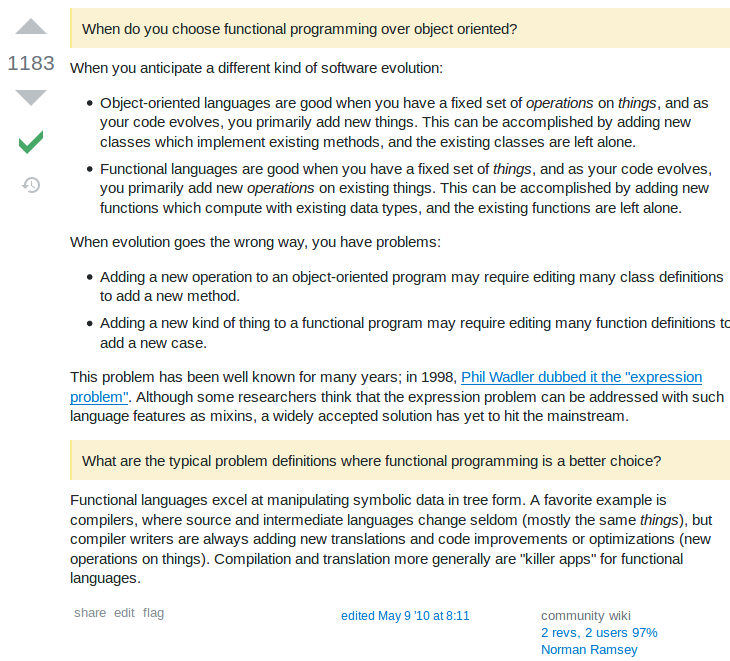

### Construction and Initialization

How does python build a class?

In [40]:
class Datasource(object):
    def __new__(cls, *args, **kwargs):
        print('Datasource.__new__ is called')
        return super().__new__(cls)  # Call the __new__ method of the parent class
        
    def __init__(self, *args, **kwargs):
        print('Datasource.__init__ is called')

Datasource()

Datasource.__new__ is called
Datasource.__init__ is called


'\__init__' is expected to return None (i.e. no 'return')

In [41]:
class Component(object):
    def __init__(self, *args, **kwargs):
        print('Component.__init__ is called')
        return -42
    
Component()

Component.__init__ is called


TypeError: __init__() should return None, not 'int'